In [1]:
from src.model import PatchMLPModel, Game
from src.player import ThresholdPlayer
from src.utils import pyplot_game
import numpy as np

In [2]:
device = 'cpu'

In [3]:

model = PatchMLPModel.load('weights/patch_mlp_7x7_256_halving.pth', device)
player = ThresholdPlayer(model, 0.01, 0.95)

In [4]:
g = np.array([[
    [9,9,9,9,9,9,9,9,9],
    [9,10,4,2,2,9,9,1,9],
    [10,10,2,1,10,2,1,2,9],
    [2,2,1,2,2,2,0,2,9],
    [0,1,1,2,10,1,1,3,9],
    [0,1,10,2,1,2,3,10,9],
    [0,1,1,1,0,1,10,10,9],
]])

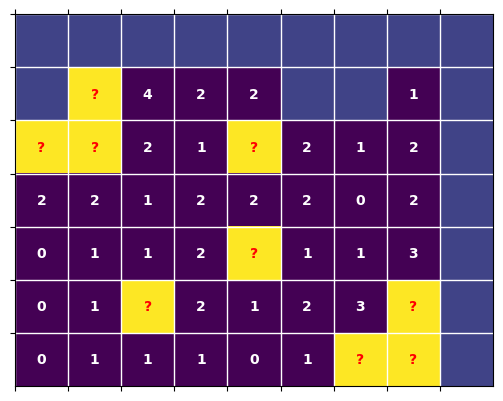

<Axes: >

In [5]:
pyplot_game(g[0])

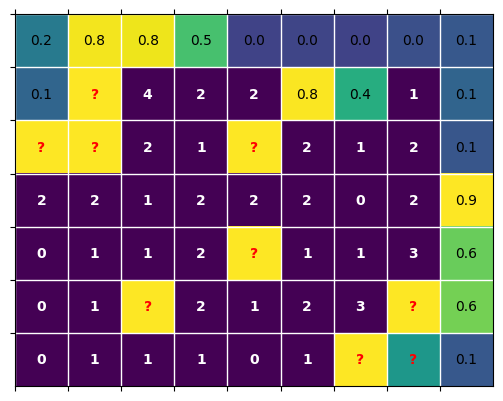

<Axes: >

In [6]:
p = model(g, 15)
pyplot_game(g[0], mine_probs=p[0])

In [7]:
g = Game(16, 30, 99, n=1)
g.random_open(0.3)
g.random_flags(0.3)

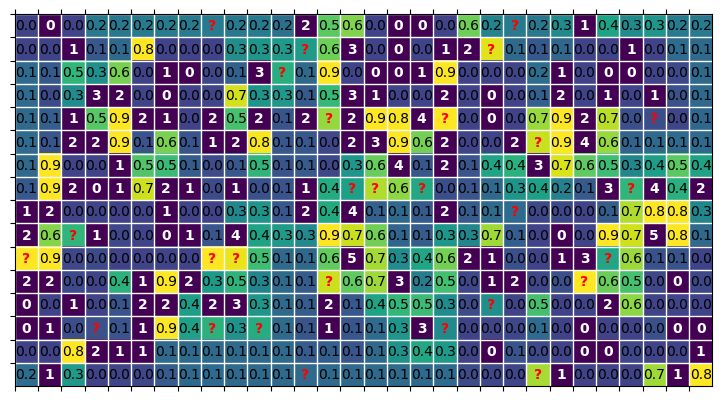

<Axes: >

In [8]:
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], hightlight_losing_only=True)

[ True]
[False]


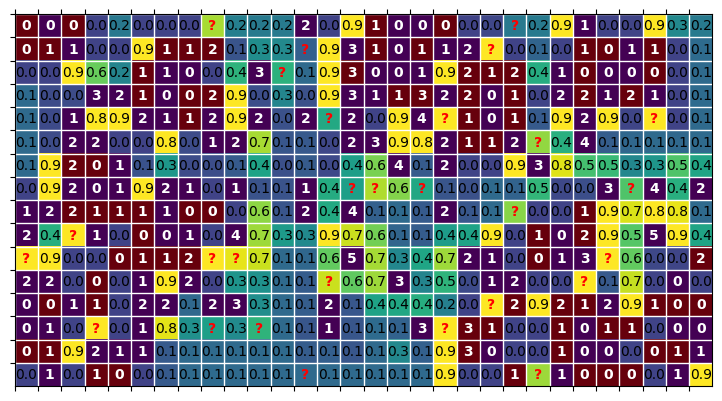

<Axes: >

In [9]:
p, o, f = player.step(g)
print(g.active_games)
print(g.won)
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], hightlight_losing_only=False)
# red = newly opened

[False]
[False]
[0.91863517]


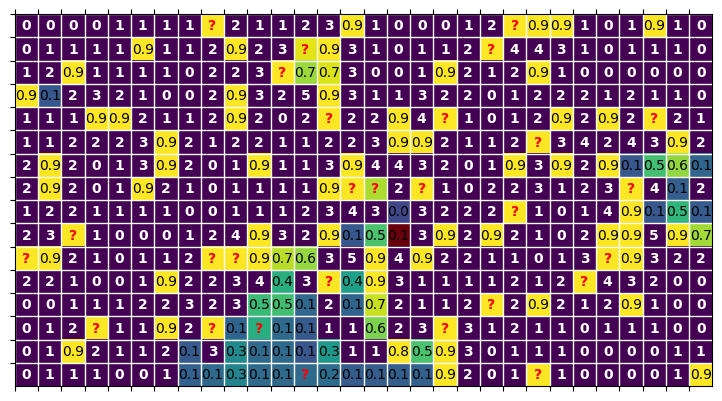

<Axes: >

In [10]:
player.play(g)
print(g.active_games)
print(g.won)
print(g.scores())
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], hightlight_losing_only=True)